In [1]:
path = "/content/drive/MyDrive/Colab Notebooks/news_datasets.csv"

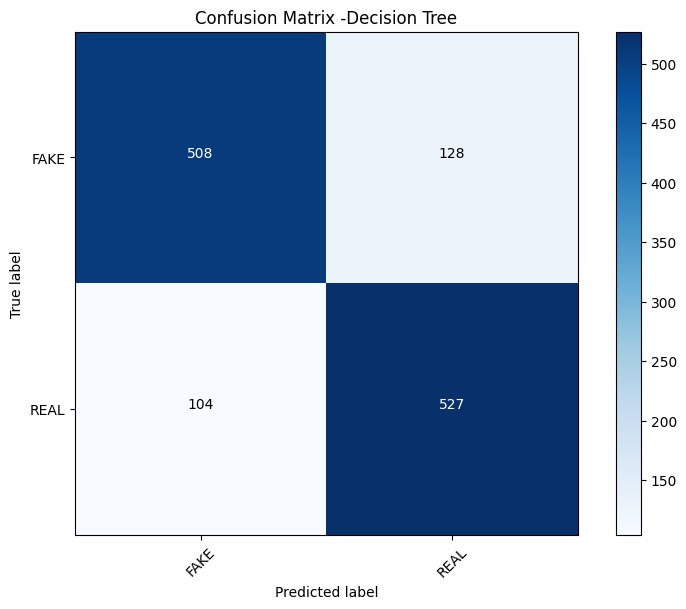

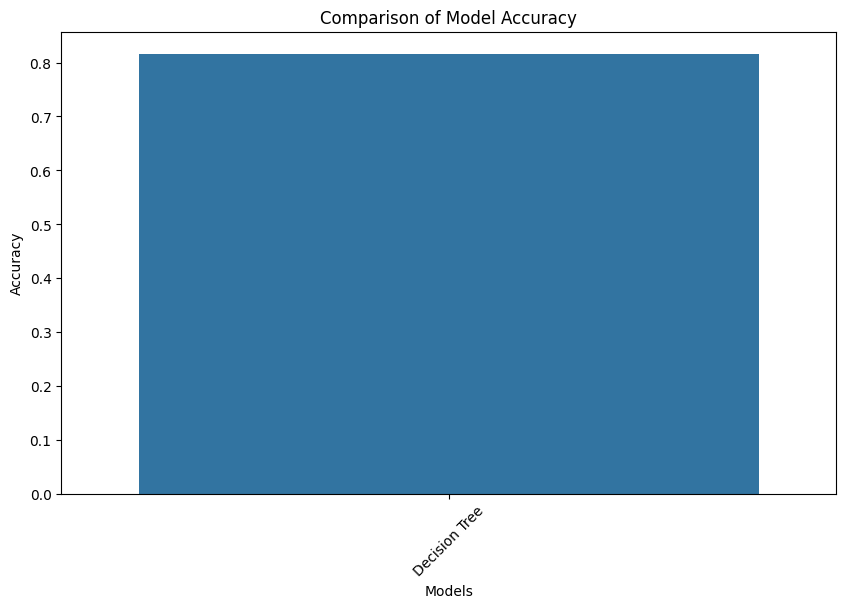

The best performing model is Decision Tree with an accuracy of 81.69%.


In [7]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news_datasets.csv')
# Data - Get the labels
labels = df.label
# Data - Split the dataset
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2,
random_state=8)
# Data - Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6)
# Data - Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)
# Models
models = {
 "Passive Aggressive Classifier": PassiveAggressiveClassifier(max_iter=50),
 "Random Forest": RandomForestClassifier(),
 "SVM": SVC(),
 "Decision Tree": DecisionTreeClassifier()
}
# Train and evaluate models
results = {}
for name, model in models.items():
 model.fit(tfidf_train, y_train)
y_pred = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
results[name] = accuracy
# Plotting Confusion Matrix Diagrams
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
 plt.figure(figsize=(8, 6))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
# Plot confusion matrix for the best performing model
best_model = max(results, key=results.get)
cm = confusion_matrix(y_test, models[best_model].predict(tfidf_test), labels=['FAKE',
'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'], title=f'Confusion Matrix -{best_model}')
# Comparing Different Models Using Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Comparison of Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
# Concluding Whether the News is Fake or Real
print(f"The best performing model is {best_model} with an accuracy of {results[best_model]*100:.2f}%.")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news_datasets.csv')

